In [281]:
import pandas as pd
import numpy as np

In [219]:
data = pd.read_csv("https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv")

In [220]:
data.sample(5)

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
4514,6896,juan prebal,juan,prebal,2013-11-30,Male,1985-02-20,31,25 - 45,Hispanic,...,9,High,2013-11-30,2014-01-17,2014-03-08,0,0,48,1,1
5285,8060,robert schoen,robert,schoen,2013-05-13,Male,1953-12-03,62,Greater than 45,Caucasian,...,1,Low,2013-05-13,2013-05-12,2013-05-15,0,2,1054,0,0
3984,6079,gayvon garrett,gayvon,garrett,2013-04-01,Male,1974-07-13,41,25 - 45,African-American,...,3,Low,2013-04-01,NaN,NaN,3,0,1096,0,0
3302,5058,jordan johnson,jordan,johnson,2014-09-27,Male,1993-02-02,23,Less than 25,African-American,...,8,High,2014-09-27,2015-02-16,2015-02-24,3,52,142,0,1
6821,10402,philip jamison,philip,jamison,2013-05-18,Male,1961-01-19,55,Greater than 45,Caucasian,...,1,Low,2013-05-18,2013-05-17,2013-05-30,2,12,1049,0,0


In [222]:
data[["race", "v_decile_score", "v_score_text", "two_year_recid"]].describe(include="all")

,race,v_decile_score,v_score_text,two_year_recid
count,7214,7214.000000,7214,7214.000000
unique,6,NaN,3,NaN
top,African-American,NaN,Low,NaN
freq,3696,NaN,4761,NaN
mean,NaN,3.691849,NaN,0.450652
std,NaN,2.510148,NaN,0.497593
min,NaN,1.000000,NaN,0.000000
25%,NaN,1.000000,NaN,0.000000
50%,NaN,3.000000,NaN,0.000000
75%,NaN,5.000000,NaN,1.000000


In [223]:
data.shape

(7214, 53)

In [224]:
race_ratio = data.groupby("race").size().sort_values()
race_ratio

race
Native American       18
Asian                 32
Other                377
Hispanic             637
Caucasian           2454
African-American    3696
dtype: int64

# Exercise 
Can you find the number of defendants classified in each category ("**Low**", "**Medium**" and "**High**" risk) by COMPAS?

In the rest of this notebook, we will simplify the prediction as a binary classification : we mark scores other than “low” as higher risk, in a variable called "**prediction**".

In [228]:
data["prediction"] = (data.score_text != "Low").astype(int)

We can now compare our predicted variable ("**prediction**") to the real outcome ("**two_year_recid**")

In [229]:
data[["prediction", "two_year_recid"]].describe()

,prediction,two_year_recid
count,7214.000000,7214.000000
mean,0.459800,0.450652
std,0.498416,0.497593
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


# First visualization

In [258]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
sns.set(font_scale=1.3)

Judges are often presented with two sets of scores from the Compas system -- one that classifies people into High, Medium and Low risk, and a corresponding decile score. There is a clear downward trend in the decile scores as those scores increase for white defendants.

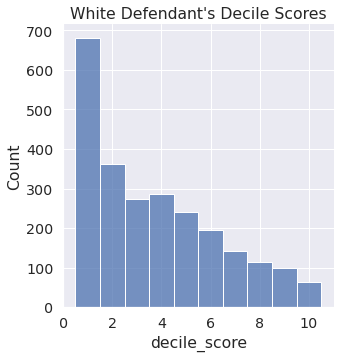

In [259]:
white = data[data.race == "Caucasian"]
sns.displot(white, x="decile_score", discrete=True)
plt.title("White Defendant's Decile Scores")
plt.show()

## Exercise
Can you plot the Compas decile score for Black defendants?

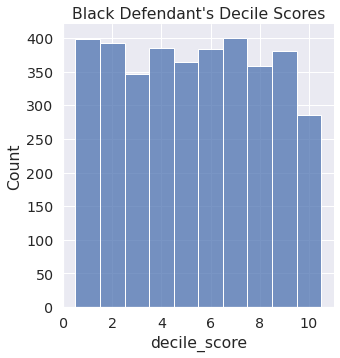

In [301]:
black = data[data.race == "African-American"]
sns.displot(black, x="decile_score", discrete=True)
plt.title("Black Defendant's Decile Scores")
plt.show()

# Confusion matrix
Let's assess the number of true positives, true negatives, false positives and false negatives predicted by COMPAS.

In [302]:
true_positives = data[(data["two_year_recid"] == 1) & (data["prediction"] == 1)]
len(true_positives)

2035

In [303]:
true_negatives = data[(data["two_year_recid"] == 0) & (data["prediction"] == 0)]
len(true_negatives)

2681

## Exercise
Please compute the 2 remaining values

In [ ]:
false_positives = 
len(false_positives)

In [ ]:
false_negatives =
len(false_negatives)

scikit learn provides a function that does the computation for you:

In [304]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [305]:
cm = confusion_matrix(data["two_year_recid"], data["prediction"])
cm

array([[2681, 1282],
       [1216, 2035]])

In jupyter notebooks, you can easily access the documentation concerning a function by writing its name followed by a question mark.

In [306]:
confusion_matrix?

Signature:
confusion_matrix(
    y_true,
    y_pred,
    *,
    labels=None,
    sample_weight=None,
    normalize=None,
)
Docstring:
Compute confusion matrix to evaluate the accuracy of a classification.

By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
is equal to the number of observations known to be in group :math:`i` and
predicted to be in group :math:`j`.

Thus in binary classification, the count of true negatives is
:math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
:math:`C_{1,1}` and false positives is :math:`C_{0,1}`.

Read more in the :ref:`User Guide <confusion_matrix>`.

Parameters
----------
y_true : array-like of shape (n_samples,)
    Ground truth (correct) target values.

y_pred : array-like of shape (n_samples,)
    Estimated targets as returned by a classifier.

labels : array-like of shape (n_classes), default=None
    List of labels to index the matrix. This may be used to reorder
    or select a subset of labels.
    If

In [307]:
ConfusionMatrixDisplay?

Init signature: ConfusionMatrixDisplay(confusion_matrix, *, display_labels=None)
Docstring:     
Confusion Matrix visualization.

It is recommend to use :func:`~sklearn.metrics.plot_confusion_matrix` to
create a :class:`ConfusionMatrixDisplay`. All parameters are stored as
attributes.

Read more in the :ref:`User Guide <visualizations>`.

Parameters
----------
confusion_matrix : ndarray of shape (n_classes, n_classes)
    Confusion matrix.

display_labels : ndarray of shape (n_classes,), default=None
    Display labels for plot. If None, display labels are set from 0 to
    `n_classes - 1`.

Attributes
----------
im_ : matplotlib AxesImage
    Image representing the confusion matrix.

text_ : ndarray of shape (n_classes, n_classes), dtype=matplotlib Text,             or None
    Array of matplotlib axes. `None` if `include_values` is false.

ax_ : matplotlib Axes
    Axes with confusion matrix.

figure_ : matplotlib Figure
    Figure containing the confusion matrix.

See Also
--------


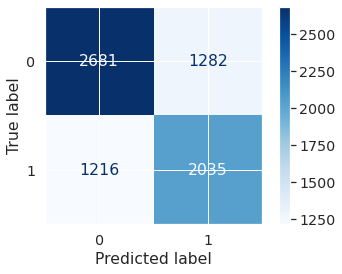

In [278]:
display = ConfusionMatrixDisplay(cm)
display.plot(cmap='Blues')

We can use seaborn to make the matrix event clearer

In [271]:
def display_matrix(dataframe):
    sns.heatmap(
        confusion_matrix(dataframe["two_year_recid"], dataframe["prediction"])/len(dataframe), 
        annot=True, 
        fmt='.2%', 
        cmap="Blues",
        yticklabels=["did not reoffend", "did reoffend"],
        xticklabels=["low risk", "high risk"],
        vmin=0.15,
        vmax=0.4
    )
    plt.xlabel("predicted label") 
    plt.ylabel("true label")
    plt.show()

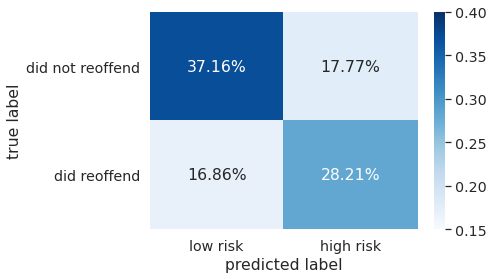

In [272]:
display_matrix(data)

In [273]:
white = data[data.race == "Caucasian"]

In [274]:
black = data[data.race == "African-American"]

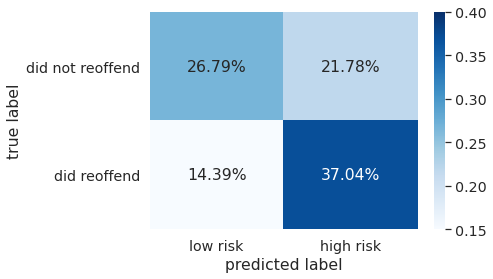

In [275]:
display_matrix(black)

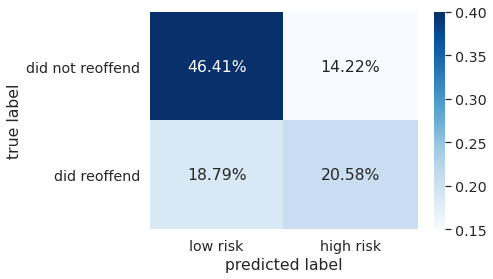

In [276]:
display_matrix(white)

accuracy
precision
recall
# disparate impact / demographic parity / statistical parity


We expect the positive rate to be the same for each group

$P( \hat{y} = 1 | S = 1) - P( \hat{y} = 1 | S \neq 1) \leq \epsilon$

In [295]:
p_yhat_given_black = len(black[black["prediction"]==1])/len(black)
p_yhat_given_white = len(white[white["prediction"]==1])/len(white)

In [296]:
p_yhat_given_black

0.5882034632034632

In [297]:
p_yhat_given_white

0.3480032599837001

In [298]:
p_yhat_given_black - p_yhat_given_white

0.2402002032197631

Problem: a fully accurate classifier may be considered
unfair, when the base rates (i.e., the proportion of actual positive outcomes) of the various
groups are significantly different.

In [310]:
p_y_given_black = len(black[black["two_year_recid"]==1])/len(black)

In [311]:
p_y_given_white = len(white[white["two_year_recid"]==1])/len(white)

In [312]:
p_y_given_black - p_y_given_white

0.12069679505498576

# Equal opportunity

$P( \hat{y} = 1 | S \neq 1, y = 1) - P( \hat{y} = 1 | S = 1, y = 1) \leq \epsilon$


In [316]:
confusion_matrix(black["two_year_recid"], black["prediction"])[0,0]/len(black)

0.26785714285714285

In [317]:
confusion_matrix(white["two_year_recid"], white["prediction"])[0,0]/len(white)

0.4641401792991035